In [1]:
from keras.datasets import reuters

/home/jailson/anaconda3/envs/cnn2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

# Decoding newswires back to text

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in
                            train_data[0]])

In [4]:
train_labels[10]

3

# Preparing the data

In [5]:
import numpy as np

In [6]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i ,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results


In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [9]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

In [11]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [64]:
#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)

In [82]:
#one_hot_train_labels[1] #ok

In [83]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [84]:
y_train[0]

3

In [85]:
#Usando o Keras para fazer o One-hot encoding
from keras.utils.np_utils import to_categorical

#y_train = np.array(train_labels)
#y_test = np.array(test_labels)
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

In [86]:
#one_hot_train_labels[0]

# Model definition

In [74]:
from keras import models
from keras import layers

In [128]:
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000, )))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [129]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Validating your approach

In [130]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [132]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 278us/step - loss: 0.1065 - acc: 0.9580 - val_loss: 1.1681 - val_acc: 0.7960
Epoch 2/20
7982/7982 [==============================] - 2s 267us/step - loss: 0.1028 - acc: 0.9592 - val_loss: 1.0781 - val_acc: 0.8090
Epoch 3/20
7982/7982 [==============================] - 2s 267us/step - loss: 0.0991 - acc: 0.9580 - val_loss: 1.1669 - val_acc: 0.7930
Epoch 4/20
7982/7982 [==============================] - 2s 268us/step - loss: 0.0951 - acc: 0.9587 - val_loss: 1.1804 - val_acc: 0.8010
Epoch 5/20
7982/7982 [==============================] - 2s 270us/step - loss: 0.0949 - acc: 0.9595 - val_loss: 1.1684 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 2s 266us/step - loss: 0.0936 - acc: 0.9563 - val_loss: 1.1206 - val_acc: 0.7990
Epoch 7/20
7982/7982 [==============================] - 2s 268us/step - loss: 0.0911 - acc: 0.9593 - val_loss: 1.2499 - val_acc: 0.7940


# Plotting the training and validation loss

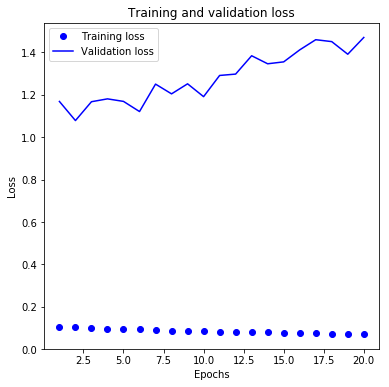

In [133]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize= (6,6))
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plotting the training and validation accuracy

<Figure size 432x288 with 0 Axes>

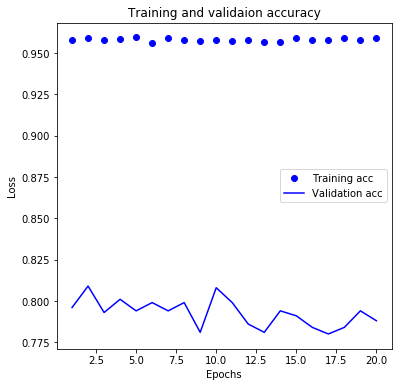

In [134]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize= (6,6))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validaion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [135]:
results = model.evaluate(x_test,y_test)
print(results)

2246/2246 [==============================] - 1s 295us/step
[1.7281785100459628, 0.7773820125196835]


In [124]:
predictions = model.predict(x_test)

In [125]:
predictions[0].shape

(46,)

In [126]:
np.sum(predictions[1])

1.0000001

In [127]:
# A maior entrada é a classe prevista - a classe com maior probabilidade:
np.argmax(predictions[0])

3